<a href="https://colab.research.google.com/github/Harsh18999/Zeotap_Data_Science_Assignment/blob/main/Harsh_Kumar_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
warnings.filterwarnings('ignore')

## **loading Data**

In [ ]:
# create dataframes of provided files
custm_df = pd.read_csv('https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE&export=download') # datafame of customers.csv
prod_df = pd.read_csv('https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0&export=download')  # datafame of products.csv
trans_df = pd.read_csv('https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF&export=download')  # datafame of transactions.csv

In [ ]:
custm_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
prod_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
trans_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
# Merge transaction data using common columns
df = pd.merge(trans_df, custm_df, on='CustomerID')
df = pd.merge(df, prod_df.drop(columns='Price'), on='ProductID')
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


In [ ]:
# find revenue by the region
revenue_by_region = df.groupby(['Region'])['TotalValue'].sum()
revenue_by_region

,TotalValue
Region,
Asia,152074.97
Europe,166254.63
North America,152313.40
South America,219352.56


In [ ]:
# plot of Revenue distribution by region

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "bar"}, {"type": "pie"}]],
    subplot_titles=("Bar Chart: Revenue by Region", "Pie Chart: Revenue Distribution")
)

fig.add_trace(
    go.Bar(x=revenue_by_region.index, y=revenue_by_region.values, name='Revenue'),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=revenue_by_region.index, values=revenue_by_region.values, name='Revenue Distribution'),
    row=1, col=2
)

fig.update_layout(title_text="Revenue Analysis", height=500, width=1200, showlegend=True)

fig.show()

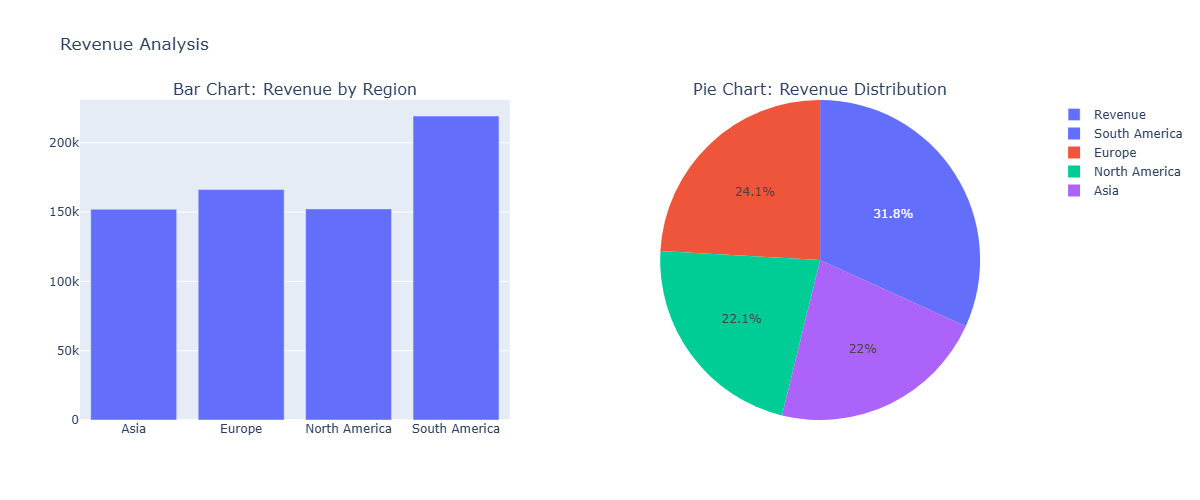

In [ ]:
# Revenue distribution by product categories
revenue_by_product_cat = df.groupby(['Category'])['TotalValue'].sum()
revenue_by_product_cat

,TotalValue
Category,
Books,192147.47
Clothing,166170.66
Electronics,180783.50
Home Decor,150893.93


In [ ]:
# Plot of Revenue distribution by product categories
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "bar"}, {"type": "pie"}]],
    subplot_titles=("Bar Chart: Revenue by Product Categories", "Pie Chart: Revenue Distribution")
)

fig.add_trace(
    go.Bar(x=revenue_by_product_cat.index, y=revenue_by_product_cat.values, name='Revenue'),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=revenue_by_product_cat.index, values=revenue_by_product_cat.values, name='Revenue Distribution'),
    row=1, col=2
)

fig.update_layout(title_text="Revenue Analysis", height=500, width=1200, showlegend=True)

fig.show()

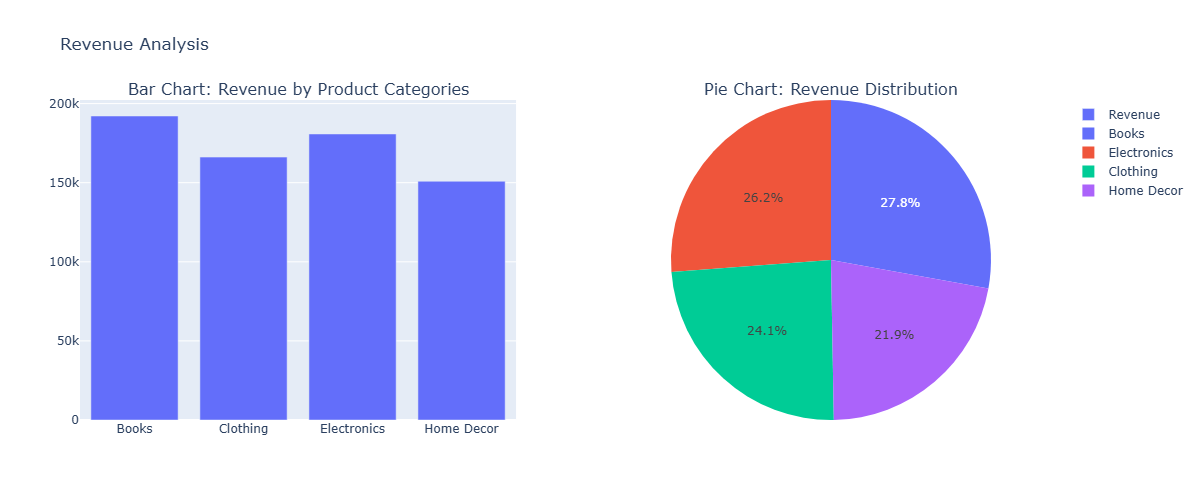

In [ ]:
# Revenue distribution by region and product categories

combine_revenue_region_cat = df.groupby(['Region', 'Category'])['TotalValue'].sum()

fig = px.bar(
    x=combine_revenue_region_cat.index.get_level_values(0),
    y=combine_revenue_region_cat.values,
    color=combine_revenue_region_cat.index.get_level_values(1),
    barmode='group',
    labels={'x': 'Region', 'y': 'Revenue'},
    title='Revenue by Region and Product Category'
)

fig.update_layout(xaxis_title='Region', yaxis_title='Revenue')
fig.show()

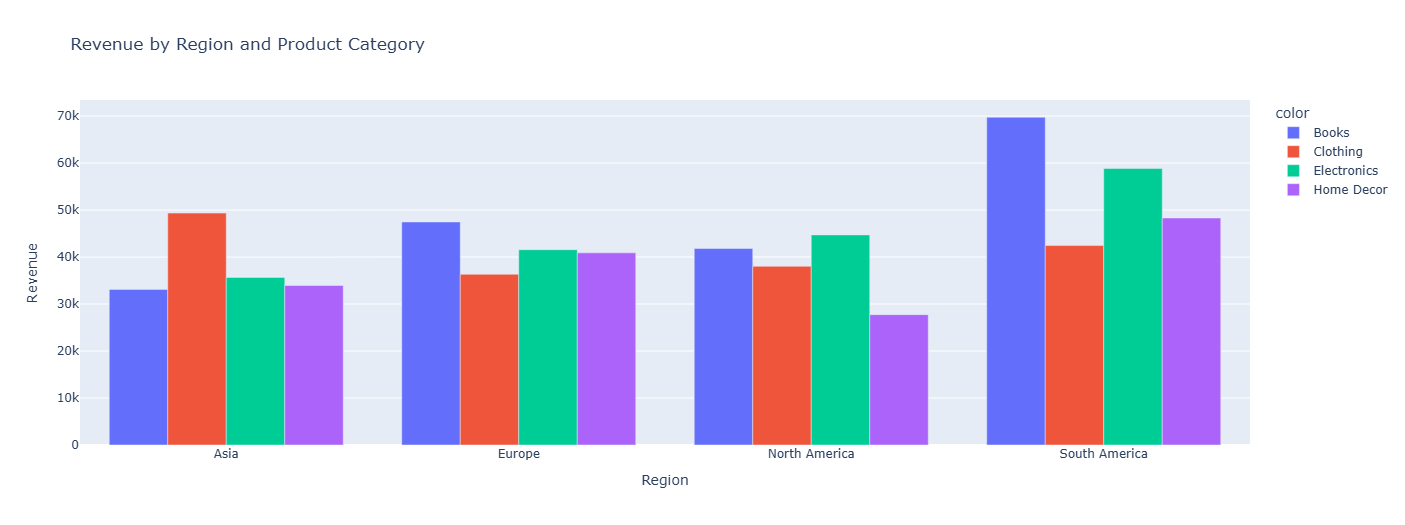

In [ ]:
# Revenue distribution by category and product
revenue_by_category_and_prod = df.groupby(['Category', 'ProductName'])['TotalValue'].sum()

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "bar"}, {"type": "bar"}], [{"type": "bar"}, {"type": "bar"}]],
    subplot_titles=("Revenue distribution of Books", "Revenue distribution of Clothing", "Revenue distribution of Electronics", "Revenue distribution of Home Decor")
)

for i, category in enumerate(['Books', 'Clothing', 'Electronics', 'Home Decor']):
    cat_df = revenue_by_category_and_prod[revenue_by_category_and_prod.index.get_level_values(0) == category].to_frame().reset_index().sort_values(by='TotalValue', ascending=False)
    fig.add_trace(
        go.Bar(x=cat_df.ProductName, y=cat_df.TotalValue, name=category),
        row=i // 2 + 1, col=i % 2 + 1
        )

fig.update_layout(title_text="Revenue Analysis", height=1300, width=1500, showlegend=True)
fig.show()

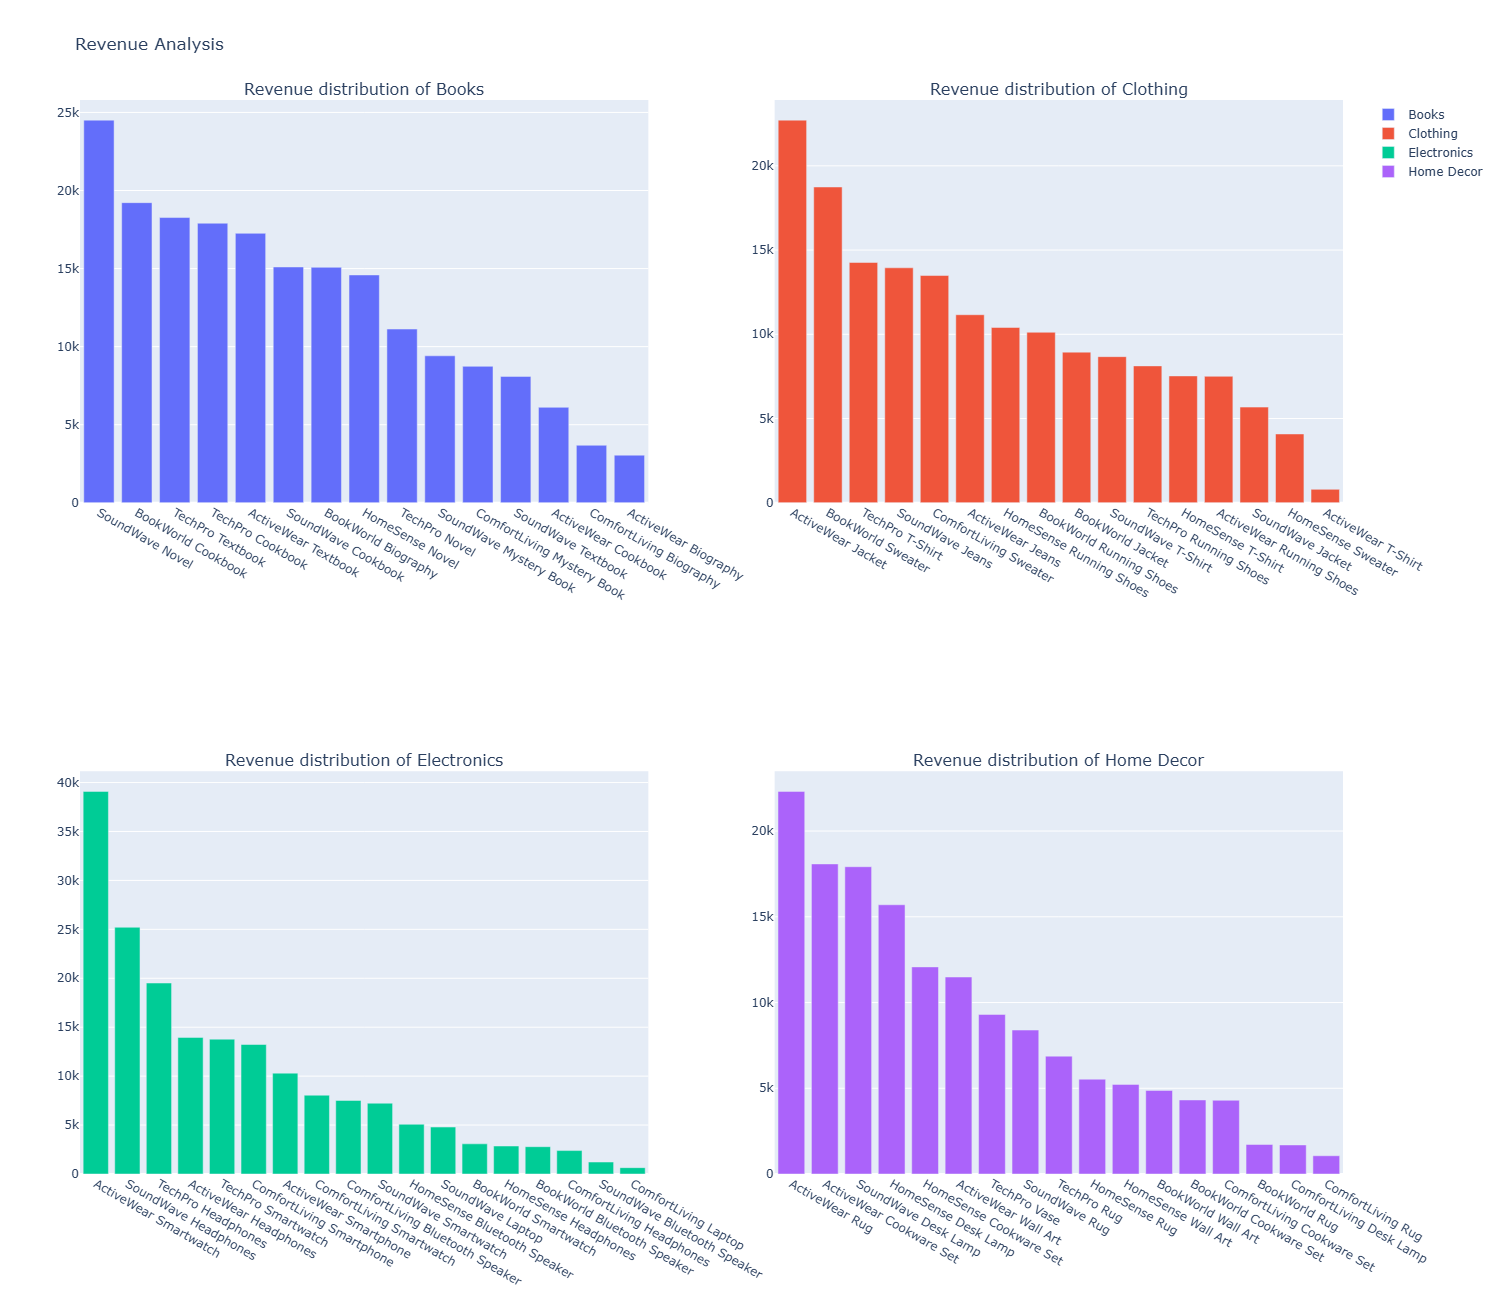

In [ ]:
# Revenue distribution by Week days

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Weekday'] = df['TransactionDate'].dt.day_name()

revenue_by_weekday = df.groupby(['Weekday'])['TotalValue'].sum()
revenue_by_weekday.sort_values(ascending=False, inplace=True)
revenue_by_weekday

,TotalValue
Weekday,
Wednesday,119203.15
Tuesday,108567.61
Monday,101984.33
Thursday,99202.71
Sunday,92605.93
Friday,87032.09
Saturday,81399.74


In [ ]:
fig = px.bar(x=revenue_by_weekday.index, y=revenue_by_weekday.values, labels={'x': 'Weekday', 'y': 'Revenue'})
fig.update_layout(title='Revenue by Weekday', xaxis_title='Weekday', yaxis_title='Revenue')
fig.show()

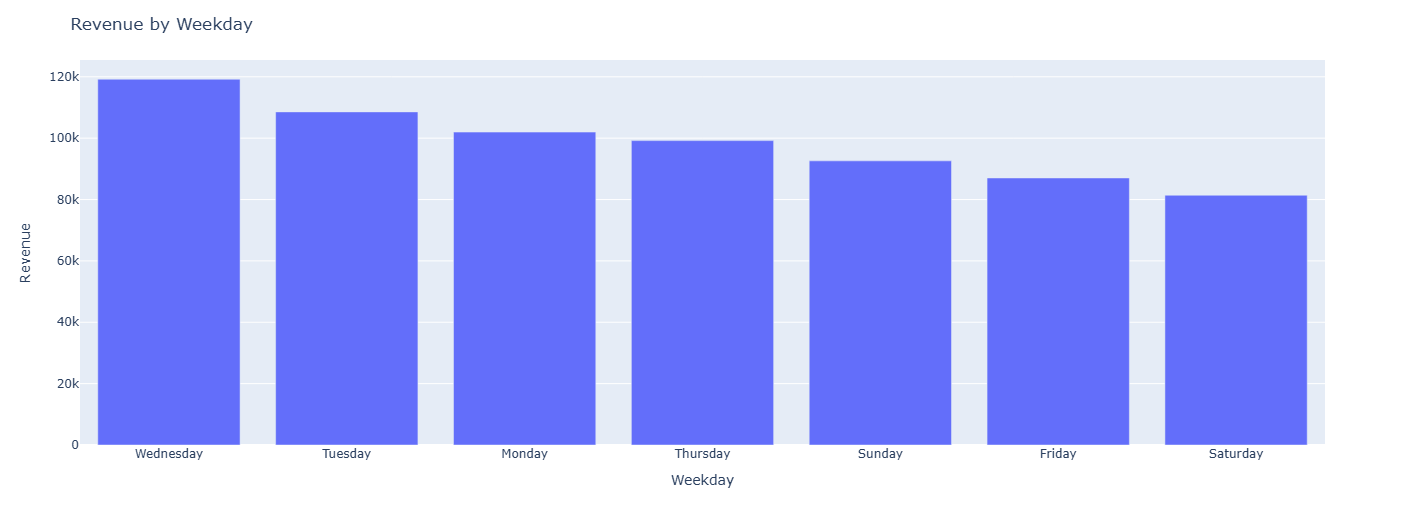

In [ ]:
# Revenue distribution by Months
revenue_by_month = df.groupby(['Monthly'])['TotalValue'].sum()
fig = px.bar(x=revenue_by_month.index, y=revenue_by_month.values, labels={'x': 'Month', 'y': 'Revenue'})


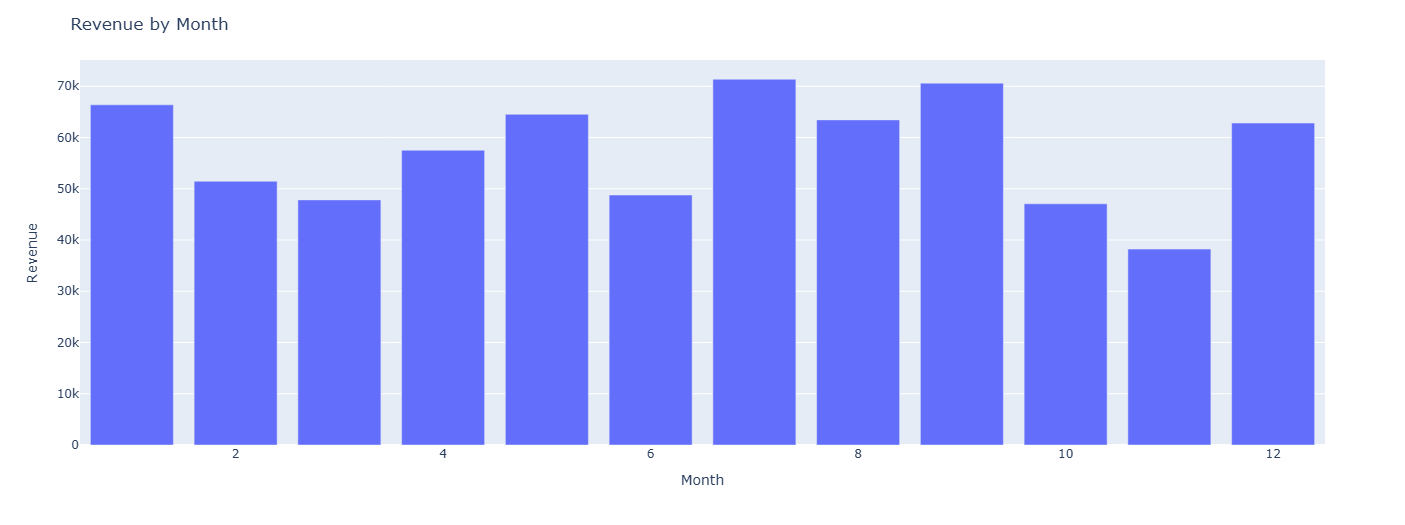

In [121]:
# Average order value by region
avg_order_val_by_region = df.groupby(['Region'])['TotalValue'].mean()

fig = px.bar(x= avg_order_val_by_region.index, y=avg_order_val_by_region.values, labels={'x': 'Region', 'y': 'Average Order Value'})
fig.update_layout(title='Average Order Value by Region', xaxis_title='Region', yaxis_title='Average Order Value')
fig.show()

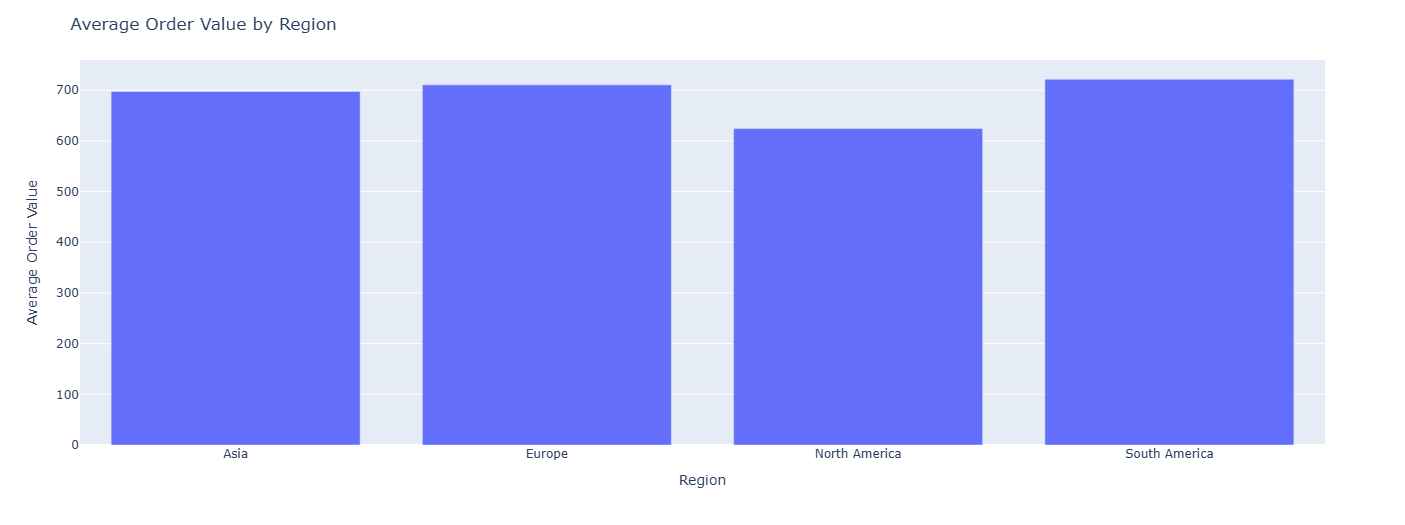

In [ ]:
avg_order_val_by_cat = df.groupby(['Category'])['TotalValue'].mean()

fig = px.bar(x= avg_order_val_by_cat.index, y=avg_order_val_by_cat.values, labels={'x': 'Category', 'y': 'Average Order Value'})
fig.update_layout(title='Average Order Value by Category', xaxis_title='Category', yaxis_title='Average Order Value')
fig.show()

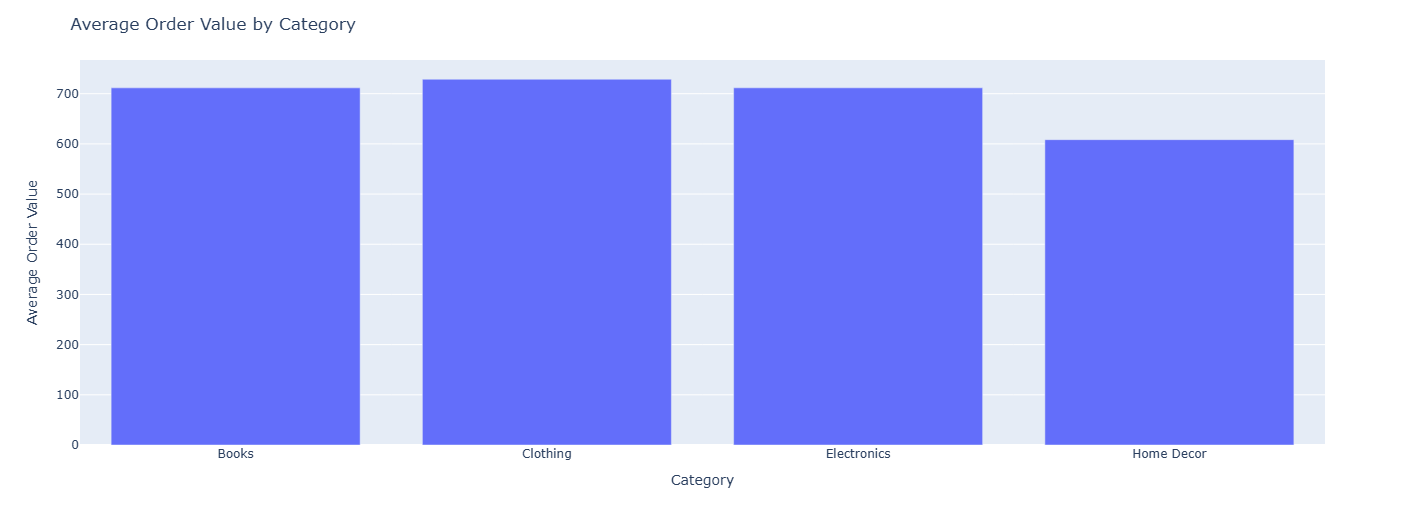

In [ ]:
# Average order value by region and product categories
avg_order_val_by_region_cat = df.groupby(['Region', 'Category'])['TotalValue'].mean()

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "bar"}, {"type": "bar"}], [{"type": "bar"}, {"type": "bar"}]],
    subplot_titles=("Avarage order value in Asia", "Avarage order value in Europe", "Avarage order value in North", "Avarage order value in Home America")
)

for i, region in enumerate(['Asia', 'Europe', 'North America', 'South America']):
    cat_df = avg_order_val_by_region_cat[avg_order_val_by_region_cat.index.get_level_values(0) == region].to_frame().reset_index().sort_values(by='TotalValue', ascending=False)
    fig.add_trace(
        go.Bar(x=cat_df.Category, y=cat_df.TotalValue, name=category),
        row=i // 2 + 1, col=i % 2 + 1
        )

fig.update_layout(title_text="Order Value Analysis", height=1200, width=1500, showlegend=True)
fig.show()

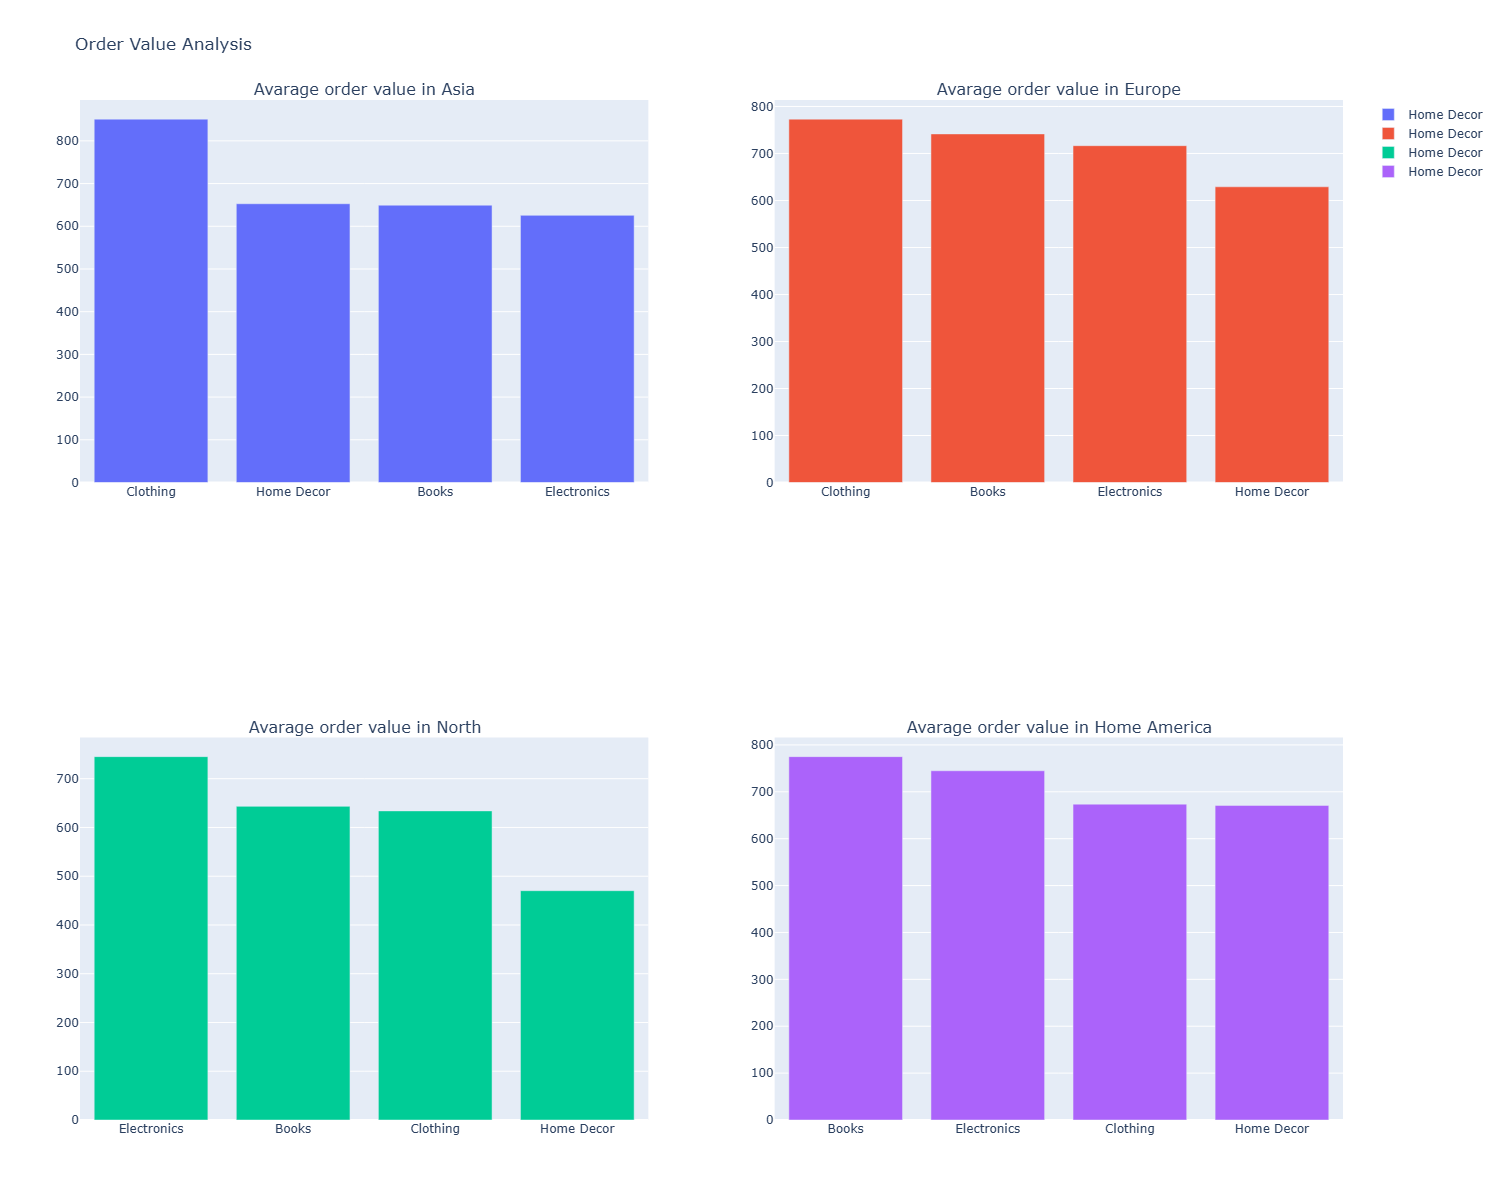

In [ ]:
df['SignupDate'] = pd.to_datetime(df['SignupDate'])
df['Days_since_signup'] = df['TransactionDate'] - df['SignupDate']
df['Days_since_signup'] = df['Days_since_signup'].dt.days
df.loc[df['Days_since_signup'] < 0, 'Days_since_signup'] = 0

In [ ]:
fig = px.scatter(df , x='Days_since_signup', y='TotalValue')
fig.update_layout(title='Days since signup vs Total Value', xaxis_title='Days since signup', yaxis_title='Total Value')
fig.show()

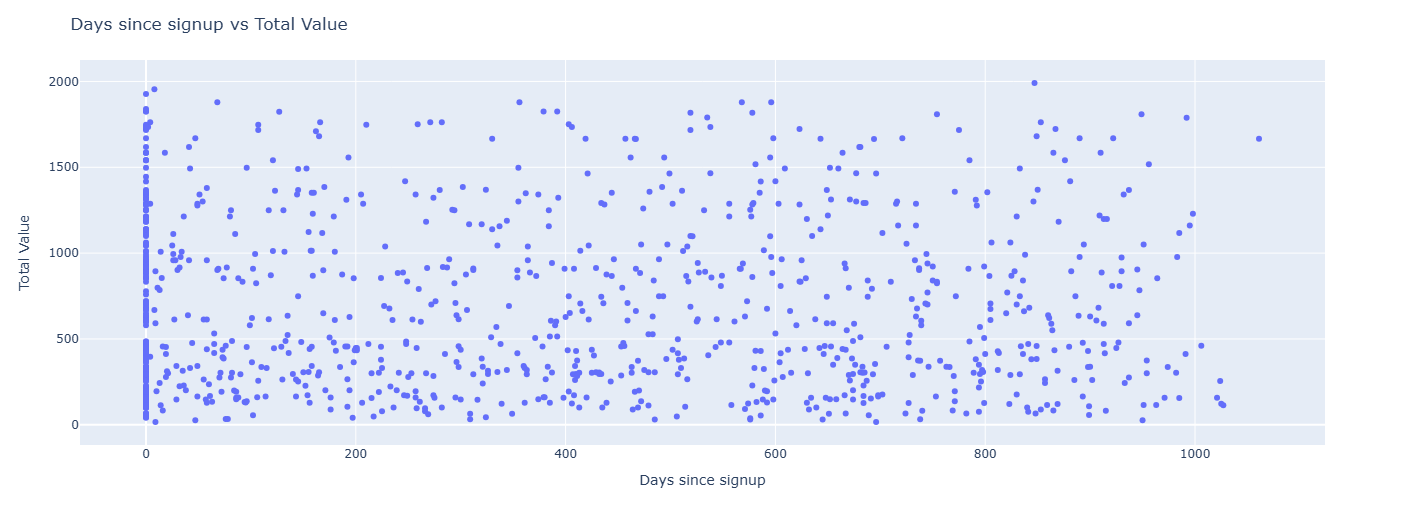